# Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Corrected import
import matplotlib.pyplot as plt


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

# Loading Model

In [6]:
cnn = tf.keras.models.load_model('trained_plant_disease_model_2.keras')

#Visualising and Performing Prediction on Single image

In [7]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


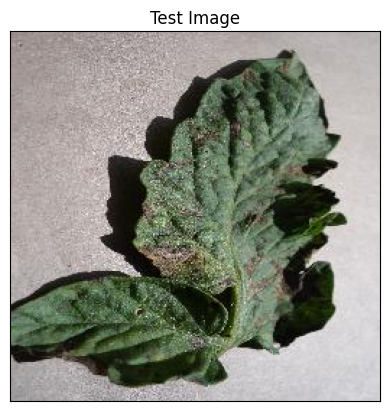

In [8]:
#Test Image Visualization
import cv2
image_path = 'test/test/TomatoEarlyBlight5.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [9]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 17s 17s/step


In [10]:
print(predictions)

[[7.20278925e-13 4.59937155e-08 3.43431880e-12 1.15222805e-12
  9.29095193e-15 1.04258464e-12 1.02487194e-11 3.93747914e-13
  1.68167754e-11 2.26139731e-13 7.61490494e-17 2.10953737e-11
  1.85304294e-09 2.35465120e-12 5.43392317e-13 7.75477213e-15
  7.03029968e-10 2.99487345e-11 2.22583663e-09 4.77737017e-10
  2.60993267e-12 8.56410602e-12 4.28928507e-12 5.10066639e-14
  9.13126047e-14 1.86023661e-15 8.57203197e-12 3.71558880e-15
  4.89006266e-11 9.99979973e-01 4.53227267e-06 2.30745600e-09
  1.54876871e-05 3.42793155e-12 2.03914441e-09 1.01446216e-13
  1.49219855e-11 3.31115552e-11]]


In [11]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

29


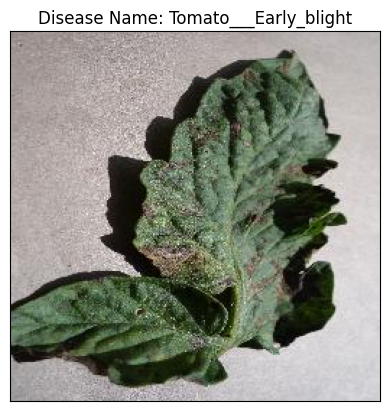

In [12]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()